# [Exp-07]CatWhiskers

## 라이브러리 및 이미지 불러오기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.99


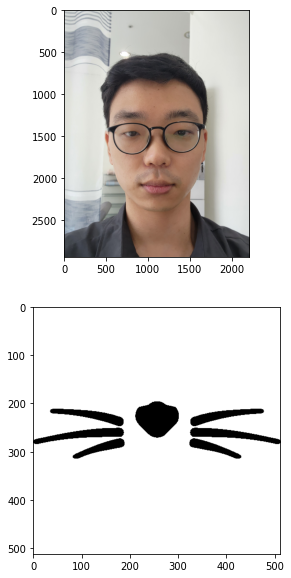

In [11]:
cat_path = 'data/cat-whiskers.png'
my_face_path = 'data/face.jpg'

img_cat = cv2.imread(cat_path)
img_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB)

img_face_original = cv2.imread(my_face_path)
img_face = img_face_original.copy()
img_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(2,1, figsize = (10,10))
axes[0].imshow(img_face)
axes[1].imshow(img_cat)
plt.show()

## 얼굴 검출 및 랜드마크 검출

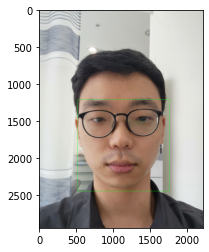

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_face, 3)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_face, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_face)
plt.show()

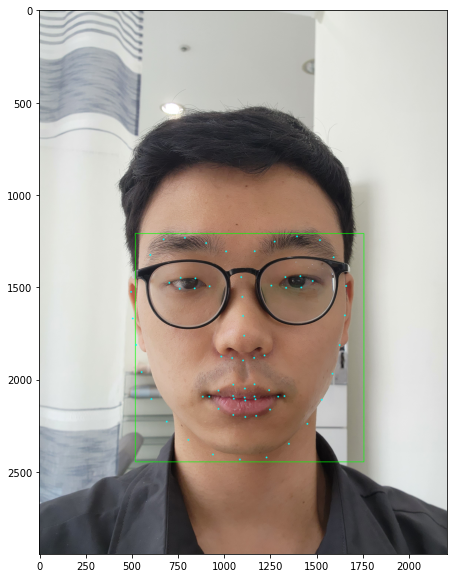

In [4]:
model_path = 'data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_face, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_face, point, 2, (0, 255, 255), 10)

plt.imshow(img_face)
plt.show()

## 스티커 적용 위치 확인하기

* index29 : 코의 중심 부분입니다.
* index33 : 인중 중심 부분입니다. 
* index36 : 왼쪽 눈의 끝
* index45 : 오른쪽 눈의 끝

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    NC_x = landmark[29][0]
    NC_y = landmark[29][1]
    NB_x = landmark[33][0]
    NB_y = landmark[33][1]
    LE_x = landmark[36][0]
    LE_y = landmark[36][1]
    RE_x = landmark[45][0]
    RE_y = landmark[45][1]
    
    print ('(NC_x,NC_y) : (%d,%d)'%(NC_x,NC_y))
    print ('(NB_x,NB_y) : (%d,%d)'%(NB_x,NB_y))
    print ('(LE_x,LE_y) : (%d,%d)'%(LE_x,LE_y))
    print ('(RE_x,RE_y) : (%d,%d)'%(RE_x,RE_y))

(NC_x,NC_y) : (1110,1762)
(NB_x,NB_y) : (1104,1896)
(LE_x,LE_y) : (705,1476)
(RE_x,RE_y) : (1481,1466)


* 너비는 눈과 눈사이의 거리로 잡겠습니다.
* 높이는 코 중심과 인중 사이의 거리로 잡겠습니다.

In [9]:
width = RE_x - LE_x
height = NB_y - NC_y
print(width, height)

776 134


* 스티커 시작 위치는 코 중심에서 width의 반만큼 왼쪽으로 보냅니다.

In [10]:
x = NC_x - width//2
y = NC_y